In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
    
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-03-27 09:04:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 108.177.11.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   238MB/s    in 0.4s    

2022-03-27 09:04:56 (238 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os 

# Walk through pizza_steak directory and list number of files
for dirpath , dirnames , filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [3]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [4]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+"/"+random_image[0])
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}")
    
    return img

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


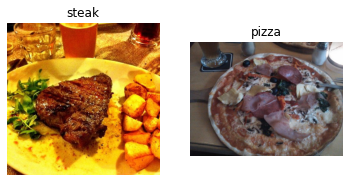

In [6]:
# View a random image from the training dataset
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(target_dir = "pizza_steak/train/",target_class = "steak")
plt.subplot(1,2,2)
pizza_img= view_random_image(target_dir = "pizza_steak/train/",target_class = "pizza") 

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32, # number of images to process at a time 
                                              target_size=(224,224), # convert all images to be 224 x 224
                                              class_mode="binary",  # type of problem we're working on
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
# Get a sample of the training data batch 
images,labels = train_data.next() # get the 'next' batch of images/labels
len(images),len(labels)

(32, 32)

In [9]:
# Get the first two images
images[:1] , images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

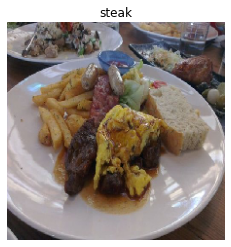

In [10]:
plt.imshow(images[0])
plt.title(class_names[labels[0].astype(int)]);
plt.axis(False);

In [11]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=50,
                          kernel_size=(3,3),
                          activation="relu",
                          input_shape=(224,224,3)), # first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D((2,2),padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid") # binary activation output
])

2022-03-27 09:05:04.512355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 09:05:04.608023: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 09:05:04.608752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 09:05:04.610670: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
# Compile the model
model_1.compile(loss="binary_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

Since we're working on a binary classification problem (pizza vs. steak), the loss function we're using is 'binary_crossentropy', if it was mult-iclass, we might use something like 'categorical_crossentropy'

In [13]:
# Fit the model
history_1 = model_1.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
                        validation_data=valid_data,validation_steps=len(valid_data))

2022-03-27 09:05:07.437425: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-27 09:05:09.231750: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


47/47 [==============================] - 19s 234ms/step - loss: 0.6654 - accuracy: 0.5440 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 10s 212ms/step - loss: 0.5715 - accuracy: 0.6927 - val_loss: 0.4448 - val_accuracy: 0.8040
Epoch 3/10
47/47 [==============================] - 9s 200ms/step - loss: 0.4775 - accuracy: 0.7860 - val_loss: 0.4174 - val_accuracy: 0.8120
Epoch 4/10
47/47 [==============================] - 9s 196ms/step - loss: 0.4408 - accuracy: 0.8140 - val_loss: 0.4290 - val_accuracy: 0.8560
Epoch 5/10
47/47 [==============================] - 10s 206ms/step - loss: 0.4252 - accuracy: 0.8160 - val_loss: 0.4007 - val_accuracy: 0.8580
Epoch 6/10
47/47 [==============================] - 9s 192ms/step - loss: 0.3803 - accuracy: 0.8373 - val_loss: 0.3528 - val_accuracy: 0.8500
Epoch 7/10
47/47 [==============================] - 9s 199ms/step - loss: 0.3630 - accuracy: 0.8527 - val_loss: 0.3341 - val_accuracy: 0.8520
Epoch 8/10
47/

In [14]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 126ms/step - loss: 0.3212 - accuracy: 0.8760


[0.32120880484580994, 0.8759999871253967]

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 50)      1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 50)      22550     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 50)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 50)      22550     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 50)      22550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 50)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 50)        2

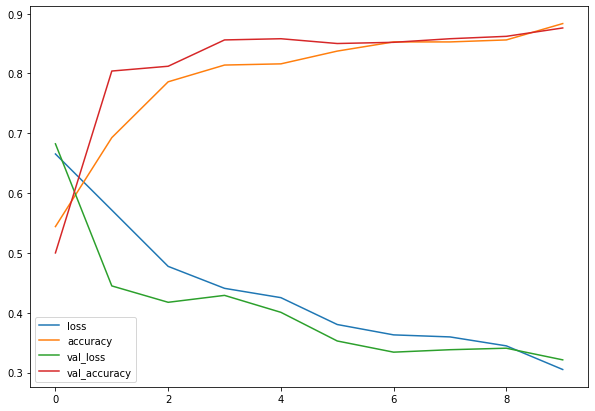

In [16]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [17]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
  Returns separate loss curves for training and validation metrics.
  """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
  # Plot loss
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="validation_accuracy")
    plt.title('Accracy')
    plt.xlabel("epochs")
    plt.legend()

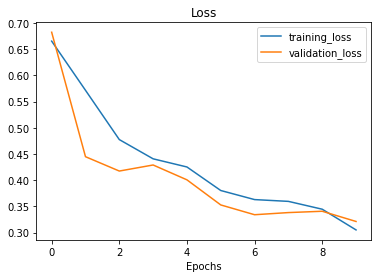

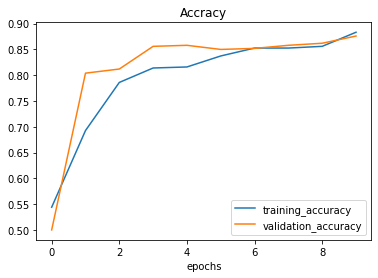

In [18]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.
Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [19]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                         rotation_range=20,# rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                         shear_range=0.2, # shear the image
                                         zoom_range=0.2, # zoom into the image
                                         width_shift_range=0.2, # shift the image width ways
                                         height_shift_range=0.2, # shift the image height ways
                                         horizontal_flip=True) #  flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator test instance without data augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Import data and augment it from training directory
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode="binary",
                                                        shuffle=False)

# Create non-augmented data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# Get data batch samples
images,labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

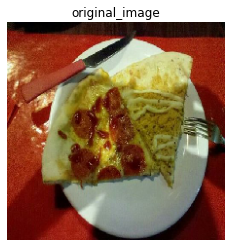

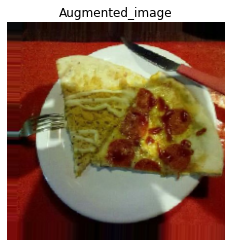

In [22]:
# Show original image and augmented image
random_number = random.randint(0,32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"original_image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented_image")
plt.axis(False);

In [23]:
# Create a CNN model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=50,
                          kernel_size=(3,3),
                          activation="relu",
                          input_shape=(224,224,3)), # first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D((2,2),padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid") # binary activation output
])

# Compile the model
model_2.compile(loss="binary_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5) # stops after 5 rounds of no improvements

# fit the model
history_2 = model_2.fit(train_data_augmented, # changed to augmented training data
                       epochs=25,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=valid_data,
                       validation_steps=len(valid_data),
                       callbacks=[early_stopping])

Epoch 1/25
47/47 [==============================] - 23s 487ms/step - loss: 0.7015 - accuracy: 0.4047 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/25
47/47 [==============================] - 23s 486ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/25
47/47 [==============================] - 22s 471ms/step - loss: 0.6938 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/25
47/47 [==============================] - 23s 480ms/step - loss: 0.6935 - accuracy: 0.4253 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/25
47/47 [==============================] - 23s 482ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/25
47/47 [==============================] - 22s 474ms/step - loss: 0.6934 - accuracy: 0.4147 - val_loss: 0.6931 - val_accuracy: 0.5000


In [24]:
model_2.evaluate(valid_data)

16/16 [==============================] - 2s 126ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931473612785339, 0.5]

Bad result because of not shuffled data

In [25]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode="binary",
                                                        shuffle=True)

Found 1500 images belonging to 2 classes.


In [26]:
# Create a CNN model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=50,
                          kernel_size=(3,3),
                          activation="relu",
                          input_shape=(224,224,3)), # first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPool2D((2,2),padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid") # binary activation output
])

# Compile the model
model_3.compile(loss="binary_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5) # stops after 5 rounds of no improvements

# fit the model
history_3 = model_3.fit(train_data_augmented_shuffled, # changed to augmented training data
                       epochs=25,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=valid_data,
                       validation_steps=len(valid_data),
                       callbacks=[early_stopping])

Epoch 1/25
47/47 [==============================] - 23s 473ms/step - loss: 0.6586 - accuracy: 0.5947 - val_loss: 0.5194 - val_accuracy: 0.8400
Epoch 2/25
47/47 [==============================] - 23s 486ms/step - loss: 0.5875 - accuracy: 0.6993 - val_loss: 0.5106 - val_accuracy: 0.7520
Epoch 3/25
47/47 [==============================] - 23s 491ms/step - loss: 0.5574 - accuracy: 0.7287 - val_loss: 0.3667 - val_accuracy: 0.8500
Epoch 4/25
47/47 [==============================] - 22s 472ms/step - loss: 0.5337 - accuracy: 0.7560 - val_loss: 0.4353 - val_accuracy: 0.7980
Epoch 5/25
47/47 [==============================] - 23s 488ms/step - loss: 0.5071 - accuracy: 0.7667 - val_loss: 0.3552 - val_accuracy: 0.8620
Epoch 6/25
47/47 [==============================] - 23s 489ms/step - loss: 0.4973 - accuracy: 0.7753 - val_loss: 0.3358 - val_accuracy: 0.8840
Epoch 7/25
47/47 [==============================] - 22s 475ms/step - loss: 0.4689 - accuracy: 0.7920 - val_loss: 0.3494 - val_accuracy: 0.8780

In [27]:
model_3.evaluate(valid_data)

16/16 [==============================] - 2s 146ms/step - loss: 0.3906 - accuracy: 0.8560


[0.39064911007881165, 0.8560000061988831]

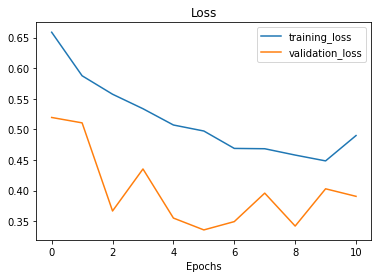

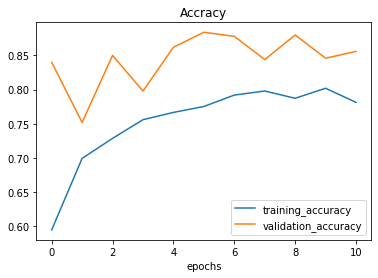

In [28]:
# Check model's performance history training on augmented data
plot_loss_curves(history_3)

### Making a prediction with our trained model

--2022-03-27 09:14:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-03-27 09:14:01 (32.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



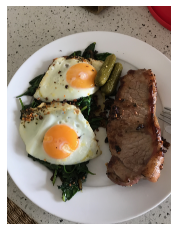

In [29]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg") 
plt.imshow(steak)
plt.axis(False);

In [30]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [31]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
    """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
    # Read in target file (an image)
    img=tf.io.read_file(filename)
    
    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    img=tf.image.decode_image(img,channels=3)
    
    # Resize the image (to the same size our model was trained on)
    img=tf.image.resize(img,size=[img_shape,img_shape])
    
    # Rescale the image (get all values between 0 and 1)
    img=img/255.
    
    return img

In [32]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.

In [33]:
# Add an extra axis
steak = tf.expand_dims(steak,axis=0)

In [34]:
pred=model_3.predict(steak)
pred

array([[0.7972253]], dtype=float32)

In [35]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [36]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [37]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

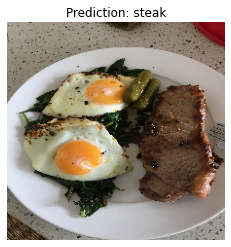

In [38]:
# Test our model on a custom image
pred_and_plot(model_3, "03-steak.jpeg", class_names)

--2022-03-27 09:14:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-03-27 09:14:16 (41.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



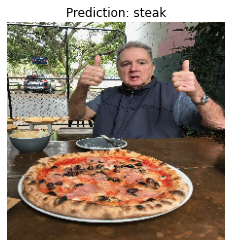

In [39]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_3,"03-pizza-dad.jpeg", class_names)

In [40]:
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=500,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 500 images belonging to 2 classes.


In [41]:
y_preds = model_3.predict(valid_data)
y_preds=tf.round(y_preds)

2022-03-27 09:14:23.487652: W tensorflow/core/kernels/gpu_utils.cc:49] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


In [42]:
len(y_preds)

500

In [43]:
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=500,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 500 images belonging to 2 classes.


In [44]:
images,labels = valid_data.next()
len(labels)

500

In [45]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """ 
    # Create the confustion matrix
    cm=confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with
    
    # Plot the figure and make it pretty
    fig,ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm,cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    
    # Are there a list of classes?
    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])
        
    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes), # create enough axis slots for each class
          yticks=np.arange(n_classes),
          xticklabels=labels, # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min())/2.
    
    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size=text_size)

In [46]:
class_names=['pizza','steak']

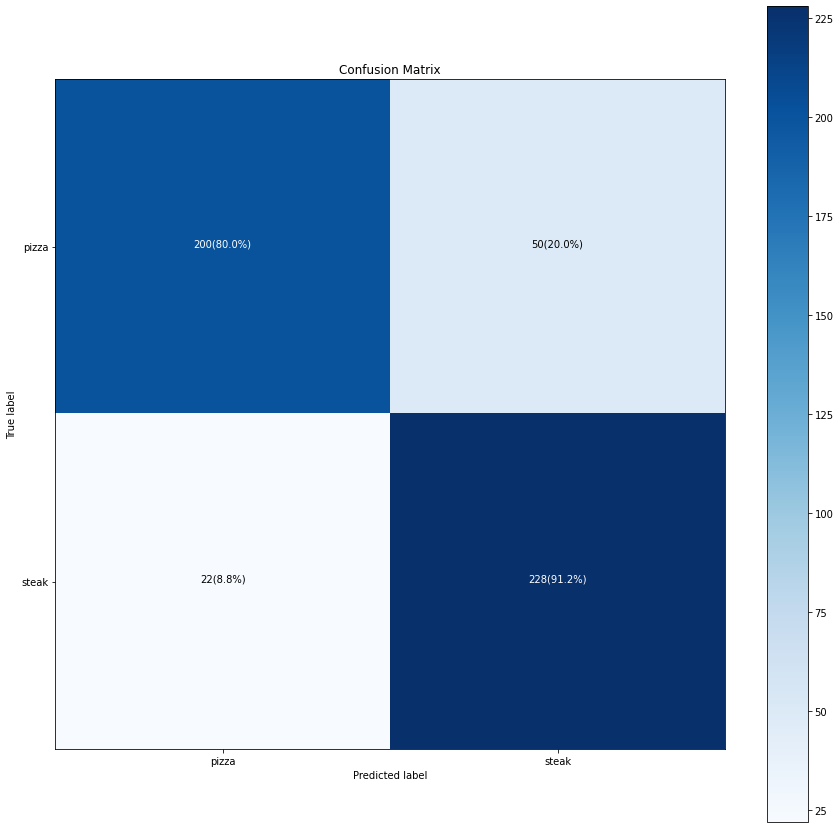

In [47]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)